# The case for 2+1 on ATLAS

In our first SLAC di-Higgs / H+ISR meeting, we were discussing the case for a 2+1 channel (one Higgs decaying to two *resolved* b-jets and one decaying to a boosted fat-jet) on ATLAS. In CMS, this was a useful channel to combine with, but on ATLAS, this didn't really help at all.

- Michael said that this was because since we were using $R=1.0$ jets on ATLAS, that was why our boosted regime was more sensitive to lower resonance masses
- I followed up with Caterina and asked her why CMS didn't try to use $R=1.5$ jets to make their boosted analysis sensitive to lower masses, and she said that it was because when you increase the jet radius, you increase the amount of PU that leaks into the jet.
- Caterina suggested that a way that could follow-up would be to look at the acceptance versus resonance mass plot and see how the acceptance evolves as I apply the following selections:
    1. trigger
    2. kinematic 
    3. b-tagging 

Since I don't know how to run the full analysis yet, I wanted to check this out in a simpler scenerio: using the MC truth sim that Michael suggested I set up! 

Since the claim is that this is just a kinematics affect, this should be reflected in my truth simulation.

*Possible issues:*
1. I'm not sure what momentum to give the resonance
2. I'm not sure which triggers to use (since they evolved over time)
3. I'm also a little confused how to apply b-tagging, I think I might need to load in some $p_T$ and $\eta$ dependent factors 

**Alternatively, maybe I could use an application to scrape the data off of a plot, and then make the plot for Caterina?**

In my chem rotation, I used this application called `datatheif`.

Note: Since I wanted this function to be able to use ROOT, I'm running this notebook in `python2` with Michael's conda enviornment from the ML b-tagging workshop.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from Xhh4b_MC_invXformSampling import *

## MC sim

- Need to pull code into this project.

**Q:** Is it ok to assume the resonance is decaying from rest?

## Resolved analysis

1. Trigger

From the $hh\rightarrow 4b$ paper:

`Events were required to feature either one b-tagged jet [24, 25] with transverse momentum pT > 225 GeV, or two b-tagged jets, either both satisfying pT > 35 GeV or both satisfying pT > 55 GeV, with different requirements on the b-tagging. Some triggers required additional non-b-tagged jets.`

2. Kinematics

    - Need at least 4 b-tagged anti-$k_t$ small-$R$ jets with $p_T > 40$ GeV and $|\eta| < 2.5$.

    - Pairing of jets to form Higgs boson candidates are only accepted if they satisfy:
        - for $m_{4j} < 1250$ GeV

        $$\frac{360 \text{ GeV}}{m_{4j}} - 0.5 < \Delta R_{jj,lead} < \frac{653 \text{ GeV}}{m_{4j}} + 0.475$$

        $$\frac{235 \text{ GeV}}{m_{4j}} < \Delta R_{jj,lead} < \frac{875 \text{ GeV}}{m_{4j}} + 0.35$$
    
        - for $m_{4j} > 1250$ GeV
        $$0 < \Delta R_{jj,lead} < 1$$
        $$0 < \Delta R_{jj,subl} < 1$$
        where leading and subleading are defined w/r.t. the scalar sum the $p_T$s of the jets making up the candidate Higgses.

     - For events with multiple allowed pairings, choose the pairing with the smallest distance  to the line from (0,0) to (120 GeV, 110 GeV) in the $(m_{2j}^{lead}, m_{2j}^{subl})$ plane.

    - Use mass dependent event selection criteria to be optimal across a range of signal masses
    $$p_T^{lead} > 0.5 m_{4j} - 103\text{ GeV}$$
    $$p_T^{subl} > 0.33 m_{4j} - 73\text{ GeV}$$

    - Require the Higgs candidates not to be too far separated (to reject multi-jet events)
    $$|\Delta \eta_{HH}| < 1.5$$

    - Signal region definition
    
    $$ X_{HH} = \sqrt{\left( \frac{m_{2j}^{lead} - 120\text{ GeV}}{0.1 m_{2j}^{lead}} \right) + \left( \frac{m_{2j}^{subl} - 110\text{ GeV}}{0.1 m_{2j}^{subl}} \right)} < 1.6$$

    - Reduce $t \bar{t}$ background, create a variable that shows the compatibility of the event with having a top quark in it
    
    $$X_{Wt} = \sqrt{\left( \frac{m_W - 80\text{ GeV}}{0.1 m_W} \right) + \left( \frac{m_t - 173\text{ GeV}}{0.1 m_t} \right) }$$

    where this discriminant is made from three of the jets in the event, with one of the jets a b from one of the Higgs candidates, and the other two making up the W candidate. Veto events whose smallest $X_{Wt} < 1.5$.

    - In the final $m_{4j}$ discriminant, multiply each Higgs boson candidate four momentum by a correction factor $m_{H} / m_{2j}$.

3. b-tagging

Jets are b-tagged using the 70% WP.

Note: Although it might be useful to put in a $p_T$ and $\eta$ dependent factor in the simulation, but I think this might be overkill atm.

### Spin 0

In [23]:
spin0_resolved = pd.read_csv("fig_02a.txt")
spin0_resolved

#DataThief /Users/Owner/Documents/diHiggs->4b/Relevant plots/fig_02a.png Monday 29-Oct-2018 11:06:41 AM
259.5202                                            0.001370                                                      
300.0000                                            0.002384                                                      
399.8500                                            0.009557                                                      
499.7001                                            0.020200                                                      
599.5502                                            0.028000                                                      
699.4003                                            0.035200                                                      
800.5997                                            0.038600                                                      
899.1004                                            0.039200                                                      
1000.2999                                           0.034400                                                      
1100.1499                                           0.028500                                                      
1200.0000                                           0.018200

### Spin 2

In [21]:
spin2_resolved = pd.read_csv("fig_02b.txt")
spin2_resolved

#DataThief /Users/Owner/Documents/diHiggs->4b/Relevant plots/fig_02b.png Monday 29-Oct-2018 10:59:31 AM
700.1497                                            0.058200                                                      
599.1018                                            0.049300                                                      
500.7485                                            0.036700                                                      
401.0479                                            0.020900                                                      
300.0000                                            0.006510                                                      
260.9281                                            0.006852                                                      
799.8502                                            0.061000                                                      
899.5509                                            0.060000                                                      
999.2515                                            0.055500                                                      
1100.2993                                           0.044200                                                      
1200.0000                                           0.028400

## Boosted analysis

1. Trigger

From the $hh\rightarrow 4b$ paper:

`In the boosted analysis, events were selected from the 2015 dataset using a trigger that required a single anti-kt jet [26] with radius parameter R = 1.0 and with pT > 360 GeV. In 2016, a similar trigger was used but with a higher threshold of pT > 420 GeV.`

2. Kinematics

    - At least two anti-$k_t$ large-$R$ jets with $p_T$ > 250 GeV, $\eta < 2.0$, $m_J > 50$ GeV.
    - $p_T^{lead}$ > 450 GeV to ensure 100% trigger efficiency
    - $\Delta \eta < 1.7$ since high-mass resonances tend to produce jets that are more central than QCD bkg
    - Each large-R jet must have at least one b-tagged ghost associated track jet.
    - Signal region definition
    
    $$ X_{HH} = \sqrt{\left( \frac{m_{2j}^{lead} - 120\text{ GeV}}{0.1 m_{2j}^{lead}} \right)^2 + \left( \frac{m_{2j}^{subl} - 110\text{ GeV}}{0.1 m_{2j}^{subl}} \right)^2} < 1.6$$


3. b-tagging

Jet are again b-tagged using the 70% WP.

### Spin 0

In [29]:
spin0_boosted = pd.read_csv("figaux_18a.txt")
spin0_boosted

#DataThief /Users/Owner/Documents/diHiggs->4b/Relevant plots/figaux_18a.png Monday 29-Oct-2018 11:17:44 AM
0.6994                                           0.001963                                                         
0.8000                                           0.002945                                                         
0.9005                                           0.009816                                                         
1.0013                                           0.029400                                                         
1.0984                                           0.048100                                                         
1.1956                                           0.061800                                                         
1.2997                                           0.070700                                                         
1.3968                                           0.074600                                                         
1.4975                                           0.076600                                                         
1.5981                                           0.077500                                                         
1.7993                                           0.077500                                                         
2.0006                                           0.076600                                                         
2.2991                                           0.071700                                                         
2.5003                                           0.065800                                                         
2.7987                                           0.055000                                                         
2.9965                                           0.048100

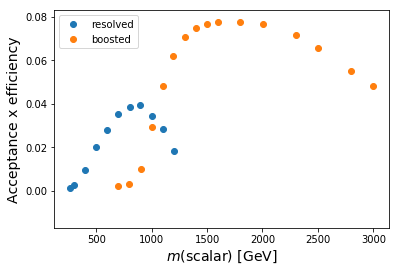

In [30]:
plt.scatter(spin0_resolved.index,spin0_resolved,label="resolved")
plt.scatter(spin0_boosted.index*1000,spin0_boosted,label="boosted")
plt.xlabel('$m$(scalar) [GeV]', fontsize=14)
plt.ylabel('Acceptance x efficiency', fontsize=14)
plt.legend()
plt.show()

### Spin 2

In [11]:
spin2_boosted = pd.read_csv("fig_05a.txt")
spin2_boosted

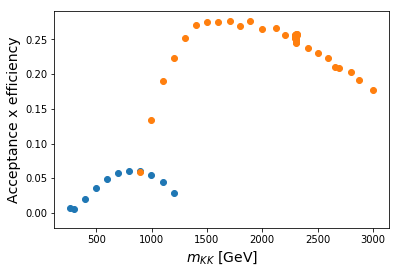

In [19]:
plt.scatter(spin2_resolved.index,spin2_resolved,label="resolved")
plt.scatter(spin2_boosted.index*1000,spin2_boosted,label="boosted")
plt.xlabel('$m_{KK}$ [GeV]', fontsize=14)
plt.ylabel('Acceptance x efficiency', fontsize=14)
plt.show()

Idea: I could move the extra point above 3 TeV, and then just not plot these points :)